In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
L=4.185 # longueur d'un tour (en km)
Ls=0.800 # longueur aux stands (en km)
Vs=20  # vitesse max aux stands (en km/h)
Ts=15  # temps perdu (en s) lors du changement de cycliste

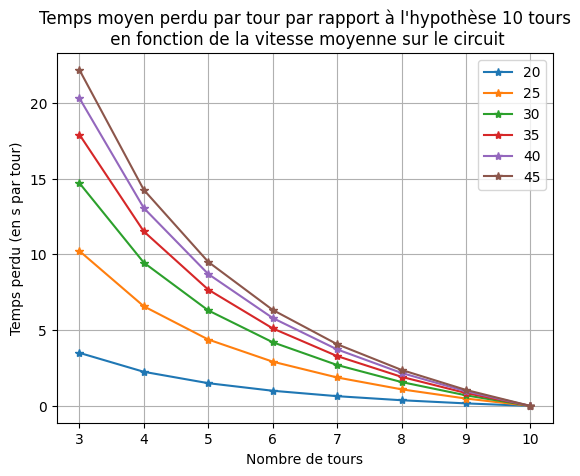

In [78]:
Nmax=10
Vrange=np.arange(20,50,5)

for V in Vrange:
    N=np.arange(3,Nmax+1)
    T=(((N*L-Ls)/V+Ls/Vs)*3600+Ts)/N  # Temps équivalent par tour

    plt.plot(N,T-T.min(),"*-")
    plt.xlabel('Nombre de tours')
    plt.ylabel('Temps perdu (en s par tour)')
    plt.title('Temps moyen perdu par tour par rapport à l\'hypothèse 10 tours\n en fonction de la vitesse moyenne sur le circuit')

plt.legend(Vrange)
plt.grid()

In [72]:
24*30/L

172.0430107526882

In [112]:
tp=np.array([10,30,60,120])
pp=[261,230,197,157]

[158.65822693  81.92918429 120.40158343]


Text(0, 0.5, 'Puissance (en W)')

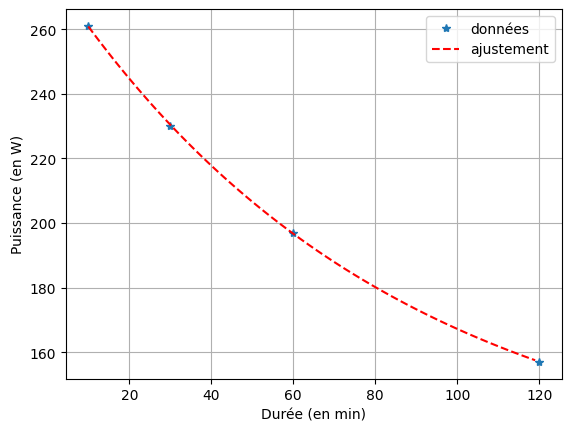

In [147]:
from scipy.optimize import curve_fit

def mypower(x, a, tau, c):
    x0=0.
    return a * np.exp(-(x-x0)/tau) + c

popt, pcov = curve_fit(mypower, tp, pp, bounds=(0, [500., 100., 500]))
print(popt)
plt.plot(tp,pp,'*')
tp2=np.arange(tp.min(),tp.max(),1)
plt.plot(tp2, mypower(tp2, *popt), 'r--')
plt.grid()
plt.legend(['données','ajustement'])
plt.xlabel('Durée (en min)')
plt.ylabel('Puissance (en W)')

[ 54.60571967  19.0233866  -77.54504407]


Text(0.5, 0, 'Vitesse en km/h')

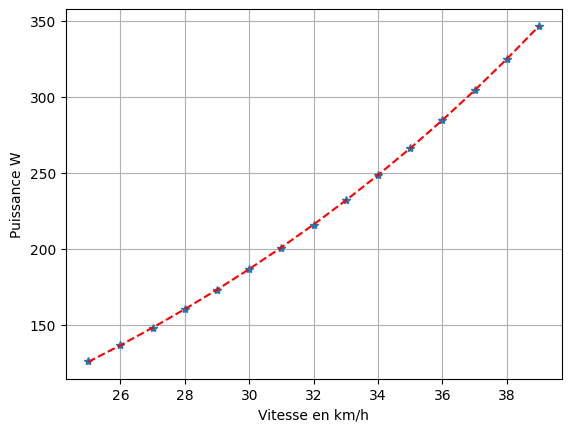

In [137]:
Cx=0.2
f=1
p=0
W=85
V=np.arange(25,40,1)
P=(f+p)*W*V/36+250/11664*Cx*V**3 # ref sur http://www.velomath.fr/dossier_velo_equation/velo_equation.html

def mypower_vs_v(x, a, b, c):
    return a * np.exp(x/b) + c

# P=f(V)=a*e^V/b+c
# V = b*ln((P-c)/a)

popt2, pcov2 = curve_fit(mypower_vs_v, V, P)
print(popt2)

plt.plot(V,P,'*')
plt.plot(V,mypower_vs_v(V, *popt2), 'r--')

plt.grid()
plt.ylabel('Puissance W')
plt.xlabel('Vitesse en km/h')

In [143]:
PP=np.arange(100,400,10)
def speed(aP):
    return popt2[1]*np.log((aP-popt2[2])/popt2[0])

Text(0, 0.5, 'Vitesse (en km/h)')

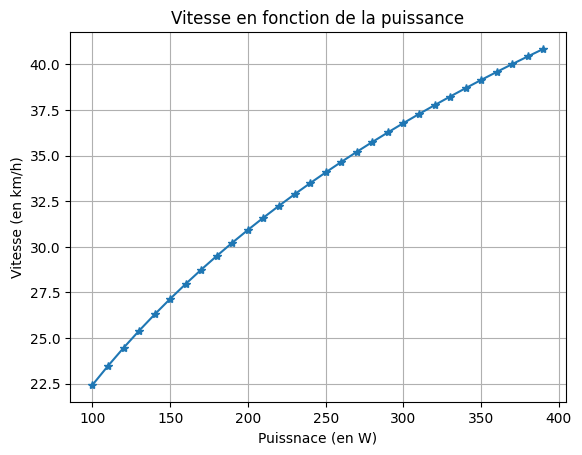

In [179]:
plt.plot(PP,speed(PP),'*-')
plt.grid()
plt.title('Vitesse en fonction de la puissance')
plt.xlabel('Puissnace (en W)')
plt.ylabel('Vitesse (en km/h)')

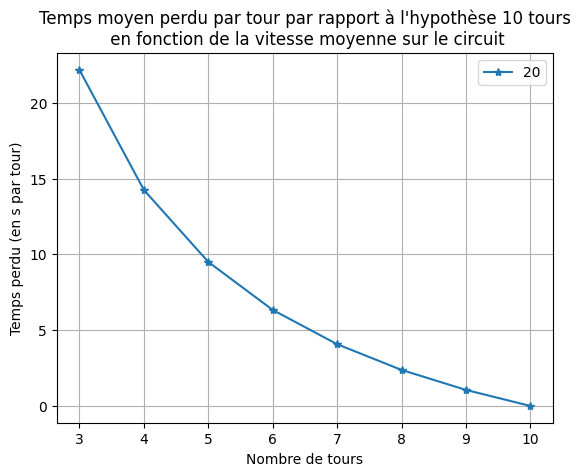

In [148]:
###### Nmax=10

N=np.arange(3,Nmax+1)
T=(((N*L-Ls)/V+Ls/Vs)*3600+Ts)/N  # Temps équivalent par tour

plt.plot(N,T-T.min(),"*-")
plt.xlabel('Nombre de tours')
plt.ylabel('Temps perdu (en s par tour)')
plt.title('Temps moyen perdu par tour par rapport à l\'hypothèse 10 tours\n en fonction de la vitesse moyenne sur le circuit')

plt.legend(Vrange)
plt.grid()

Text(0.5, 1.0, 'Vitesse en fonction du temps pour différents nombres de tours')

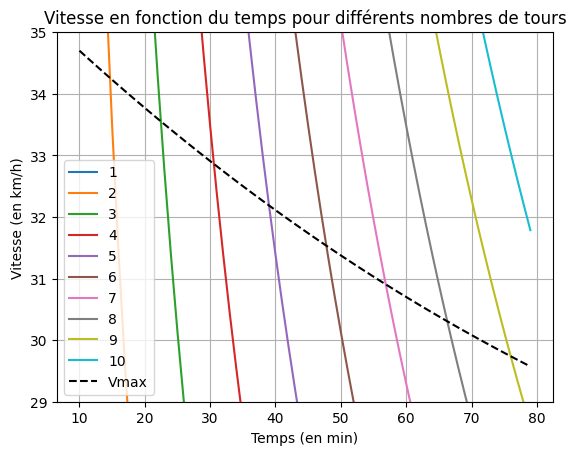

In [189]:
t=np.arange(10,80) # in minutes
for i in range(1,11):
    d=i*L
    v=d/t*60
    plt.plot(t,v)
    plt.grid()

leg=list(range(1,11))
leg.append('Vmax')
plt.plot(t,speed(mypower(t,*popt)),'k--')
plt.legend(leg)
plt.ylim(29,35)
plt.grid()
plt.xlabel('Temps (en min)')
plt.ylabel('Vitesse (en km/h)')
plt.title('Vitesse en fonction du temps pour différents nombres de tours')

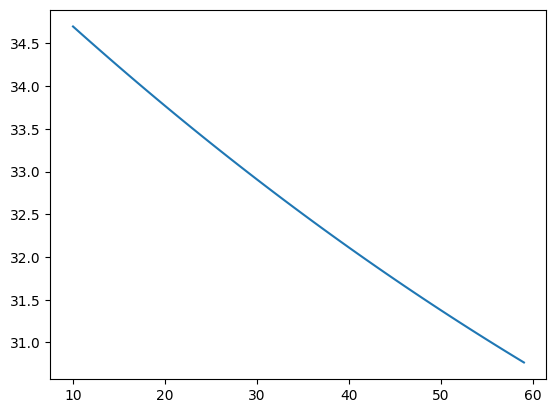

In [186]:
2*4*L/33*60

60.87272727272727

In [187]:
8*L/30.5*60

65.8622950819672

In [190]:
3*4*L/32.8*60

91.8658536585366

In [191]:
2*6*L/31.5*60

95.65714285714286

In [192]:
24*60/40

36.0

In [193]:
36*5

180